# Exercice 01

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Mister-AI-S/Book-01-Machine-Learning-Supervised-Learning/edit/main/Code01_Linear_Regression_Ex01.ipynb)



#### In this exercise, we focus on implementing linear regression using Gradient Descent by generating synthetic data with a linear relationship to simulate a real-world dataset.

## Step 1: Generate Synthetic Data
#### To start, we’ll create a small synthetic dataset to perform our regression on.

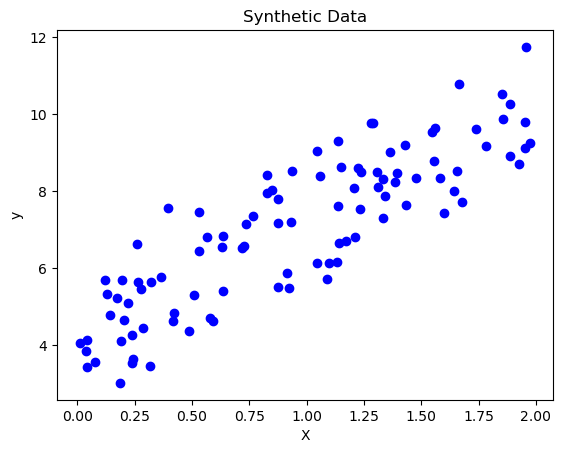

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data for regression
np.random.seed(0)  # To ensure reproducibility
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Plotting the data
plt.scatter(X, y, color='blue')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Synthetic Data")
plt.show()

## Step 2: Define the Model
#### Define a function for the linear regression model, which calculates the predicted value y_pred based on the current weights w and bias b.


In [25]:
def predict(X, w, b):
    return (X.dot(w) + b).reshape(X.shape[0],1)

## Step 3: Define the Cost Function
#### The cost function calculates the Mean Squared Error (MSE) between predicted values and actual values.

In [28]:
def compute_cost(X, y, w, b):
    y_pred = predict(X, w, b)
    cost = (1 / (2 * len(y))) * np.sum((y_pred - y) ** 2)
    return cost

## Step 4: Calculate the Gradients
#### We define a function to compute the gradients of the cost function with respect to w and b.

In [31]:
def compute_gradients(X, y, w, b):
    y_pred = predict(X, w, b)
    dw = (1 / len(y)) * X.T.dot(y_pred - y)
    db = (1 / len(y)) * np.sum(y_pred - y)
    return dw, db

## Step 5: Implement the Gradient Descent Algorithm
#### Now we encapsulate the gradient descent algorithm into a function that iteratively updates the parameters to minimize the cost.

In [34]:
def gradient_descent(X, y, w, b, learning_rate, n_iterations):
    cost_history = []
    
    for i in range(n_iterations):
        # Calculate gradients
        dw, db = compute_gradients(X, y, w, b)
        
        # Update parameters
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        # Record the cost for convergence tracking
        cost = compute_cost(X, y, w, b)
        cost_history.append(cost)
        
        # Print the cost every 100 iterations
        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost}")
    
    return w, b, cost_history

## Summary
#### - predict(X, w, b): Predicts output values based on input X, weights w, and bias b.
#### - compute_cost(X, y, w, b): Calculates the cost for the current model parameters.
#### - compute_gradients(X, y, w, b): Computes gradients to update parameters.
#### - gradient_descent(X, y, w, b, learning_rate, n_iterations): Optimizes the model parameters using gradient descent.
#### By defining each of these functions, we create a modular code structure that allows for easy adjustments and reuse in other linear regression tasks.

## Step 6: Train the Model
#### Now we can use these functions to initialize the parameters, run the gradient descent algorithm, and visualize the results.

Iteration 0: Cost = 49.226959460010534
Iteration 100: Cost = 1.5800012447902054
Iteration 200: Cost = 0.7550591098770457
Iteration 300: Cost = 0.6756717852493873
Iteration 400: Cost = 0.6261224155992146
Iteration 500: Cost = 0.5903425777909567
Iteration 600: Cost = 0.5644191127732515
Iteration 700: Cost = 0.5456355200101429
Iteration 800: Cost = 0.5320253066259962
Iteration 900: Cost = 0.5221636195332404


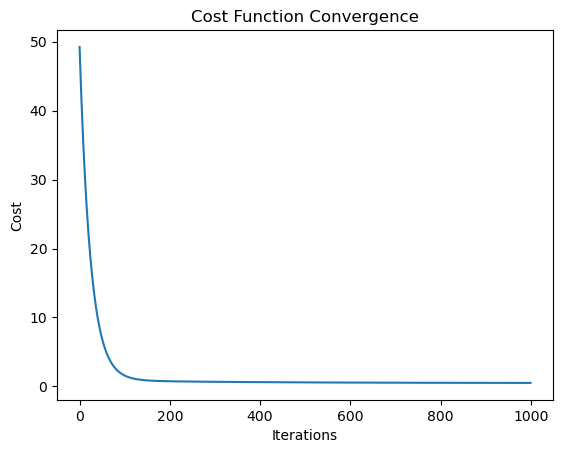

In [38]:
# Initialize parameters
w = np.random.randn(1)
b = np.random.randn(1)
learning_rate = 0.01
n_iterations = 1000

# Run gradient descent
w, b, cost_history = gradient_descent(X, y, w, b, learning_rate, n_iterations)

# Plot cost evolution
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Convergence")
plt.show()

## Step 7: Visualize the Regression Line
#### Finally, we plot the data along with the regression line based on the trained model.

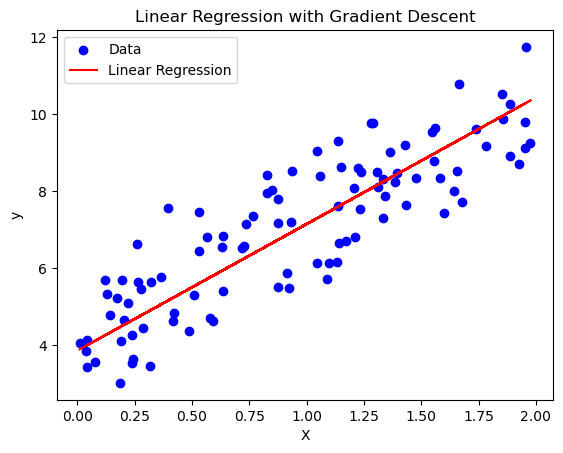

In [41]:
# Final predictions
y_pred = predict(X, w, b)

# Plot regression line
plt.scatter(X, y, color='blue', label="Data")  # Scatter plot for the data
plt.plot(X, y_pred, color='red', label="Linear Regression")  # Regression line

# Set labels for the axes
plt.xlabel("X")
plt.ylabel("y")

# Add a legend
plt.legend()

# Add title
plt.title("Linear Regression with Gradient Descent")

# Show the plot
plt.show()